# Analisi performance classificatore KNN

In [13]:
# Import dei pacchetti che mi servono nell'analisi
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# Caricamento dei risultati ottenuti nel codice "KNN.py"
risultati = np.load("Results/KNN.npz", allow_pickle = True)

In [15]:
# Stampo quali sono le keys per averle sott'occhio
for k in risultati.keys():
    print(k)

globConfusionMatrix
globAccuracy
globPrecision
globRecall
globF1
globxROC
globyROC
globAUC
globConfusionMatrixErr
globAccuracyErr
globPrecisionErr
globRecallErr
globF1Err
globxROCErr
globyROCErr
globAUCErr
list_grid
iperParam_n_neighbors
iperParam_weights
iperParam_algorithm
iperParam_p


---

### Verifico quale iterazione ha ottenuto il miglior risultato degli Scoring

In [16]:
print(f"Il valore massimo della Accuracy è stato {np.max(risultati['globAccuracy'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globAccuracy']):d}")
print(f"Il valore massimo della Precision è stato {np.max(risultati['globPrecision'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globPrecision']):d}")
print(f"Il valore massimo della Recall è stato {np.max(risultati['globRecall'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globRecall']):d}")
print(f"Il valore massimo della F1 è stato {np.max(risultati['globF1'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globF1']):d}")
print(f"Il valore massimo della AUC è stato {np.max(risultati['globAUC'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globAUC']):d}")

Il valore massimo della Accuracy è stato 57.32 % ed è stato ottenuto all'iterazione 34
Il valore massimo della Precision è stato 54.46 % ed è stato ottenuto all'iterazione 34
Il valore massimo della Recall è stato 51.95 % ed è stato ottenuto all'iterazione 33
Il valore massimo della F1 è stato 52.93 % ed è stato ottenuto all'iterazione 33
Il valore massimo della AUC è stato 59.89 % ed è stato ottenuto all'iterazione 35


In [17]:
# Visto che ci sono 3 indici di iterazioni nelle quali gli scoring sono risultati i migliori, vedo ogni scoring se varia di molto tra di esse
iter_1 = 33
iter_2 = 34
iter_3 = 35

print(f"\t\t Iterazione {iter_1} \t\tIterazione {iter_2} \t\tIterazione {iter_3}" )
print(f"Accuracy:\t {risultati['globAccuracy'][iter_1]*100:.2f} ± {risultati['globAccuracyErr'][iter_1]*100:.2f} % \
       \t{risultati['globAccuracy'][iter_2]*100:.2f} ± {risultati['globAccuracyErr'][iter_2]*100:.2f} % \
       \t{risultati['globAccuracy'][iter_3]*100:.2f} ± {risultati['globAccuracyErr'][iter_3]*100:.2f} % ")
print(f"Precision:\t {risultati['globPrecision'][iter_1]*100:.2f} ± {risultati['globPrecisionErr'][iter_1]*100:.2f} % \
       \t{risultati['globPrecision'][iter_2]*100:.2f} ± {risultati['globPrecisionErr'][iter_2]*100:.2f} % \
       \t{risultati['globPrecision'][iter_3]*100:.2f} ± {risultati['globPrecisionErr'][iter_3]*100:.2f} % ")
print(f"Recall:\t\t {risultati['globRecall'][iter_1]*100:.2f} ± {risultati['globRecallErr'][iter_1]*100:.2f} % \
       \t{risultati['globRecall'][iter_2]*100:.2f} ± {risultati['globRecallErr'][iter_2]*100:.2f} % \
       \t{risultati['globRecall'][iter_3]*100:.2f} ± {risultati['globRecallErr'][iter_3]*100:.2f} % ")
print(f"F1:\t\t {risultati['globF1'][iter_1]*100:.2f} ± {risultati['globF1Err'][iter_1]*100:.2f} % \
       \t{risultati['globF1'][iter_2]*100:.2f} ± {risultati['globF1Err'][iter_2]*100:.2f} % \
       \t{risultati['globF1'][iter_3]*100:.2f} ± {risultati['globF1Err'][iter_3]*100:.2f} % ")
print(f"AUC:\t\t {risultati['globAUC'][iter_1]*100:.2f} ± {risultati['globAUCErr'][iter_1]*100:.2f} % \
       \t{risultati['globAUC'][iter_2]*100:.2f} ± {risultati['globAUCErr'][iter_2]*100:.2f} % \
       \t{risultati['globAUC'][iter_3]*100:.2f} ± {risultati['globAUCErr'][iter_3]*100:.2f} % ")

		 Iterazione 33 		Iterazione 34 		Iterazione 35
Accuracy:	 57.21 ± 0.09 %        	57.32 ± 0.07 %        	57.32 ± 0.07 % 
Precision:	 53.95 ± 0.10 %        	54.46 ± 0.09 %        	54.09 ± 0.08 % 
Recall:		 51.95 ± 0.22 %        	47.84 ± 0.20 %        	51.78 ± 0.22 % 
F1:		 52.93 ± 0.14 %        	50.94 ± 0.12 %        	52.91 ± 0.13 % 
AUC:		 59.89 ± 0.11 %        	59.71 ± 0.10 %        	59.89 ± 0.10 % 


Visto che sono tutti molto simili osservo quali erano le condizioni iniziali degli iperparametri

In [18]:
print(f"\t\t Iterazione {iter_1} \t\tIterazione {iter_2} \t\tIterazione {iter_3} " )
print(f"n_neighbors: \t\t{risultati['iperParam_n_neighbors'][iter_1]} \
       \t\t{risultati['iperParam_n_neighbors'][iter_2]} \
       \t\t{risultati['iperParam_n_neighbors'][iter_3]} ")
print(f"weights: \t\t{risultati['iperParam_weights'][iter_1]} \
       \t{risultati['iperParam_weights'][iter_2]}  \
       \t{risultati['iperParam_weights'][iter_3]} ")
print(f"algorithm: \t\t{risultati['iperParam_algorithm'][iter_1]} \
       \t{risultati['iperParam_algorithm'][iter_2]} \
       \t{risultati['iperParam_algorithm'][iter_3]} ")
print(f"p: \t\t\t{risultati['iperParam_p'][iter_1]} \
       \t\t{risultati['iperParam_p'][iter_2]} \
       \t\t{risultati['iperParam_p'][iter_3]} ")

		 Iterazione 33 		Iterazione 34 		Iterazione 35 
n_neighbors: 		50        		50        		50 
weights: 		distance        	uniform         	distance 
algorithm: 		ball_tree        	ball_tree        	ball_tree 
p: 			1        		2        		2 


Posso notare che i parametri n_neighbors e algorithm sono gli stessi per tutte e 3 le iterazioni, variano i parametri weights e p.

Sono propenso a non considerare l'iterazione 34 perchè ha il lo scoring più basso tra tutti e tra le iterazioni 33 e 35, definirei che il miglior caso sia l'iterazione 35 visto che i risultati di scoring sono molto simili al 33, ma sono leggermente migliori e con un errore minore

In [19]:
# Definisco quindi il miglior caso: l'iterazione 216
miglior_caso = 35

### Verifico qual era la configurazione dei parametri che ha ottenuto il miglior risultato degli Scoring

In [20]:
print(f"Il numero di vicini da considerare era: {risultati['iperParam_n_neighbors'][miglior_caso]}")
print(f"L'agoritmo per pesare i punti era: {risultati['iperParam_weights'][miglior_caso]}")
print(f"L'algoritmo utilizzato era: {risultati['iperParam_algorithm'][miglior_caso]}")
print(f"La definizione di distanza era: {risultati['iperParam_p'][miglior_caso]}")

Il numero di vicini da considerare era: 50
L'agoritmo per pesare i punti era: distance
L'algoritmo utilizzato era: ball_tree
La definizione di distanza era: 2


---

### Disegno la ROC curve del miglior caso

In [21]:
%matplotlib inline

In [22]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("ROC Curve", fontsize = 20)

ax.plot(risultati['globxROC'][:,miglior_caso], risultati['globyROC'][:,miglior_caso], c = "tab:blue", label = "Miglior caso")
ax.plot((0, 1), (0, 1), c = 'k', ls = "--", label = "Peggior scenario")

ax.set_xlabel("False Positive Rate (FPR)", fontsize = 14)
ax.set_ylabel("True Positive Rate (TPR)", fontsize = 14)
ax.legend(fontsize = 14)
ax.grid()
plt.show()

---

### Disegno la Confusion Matrix

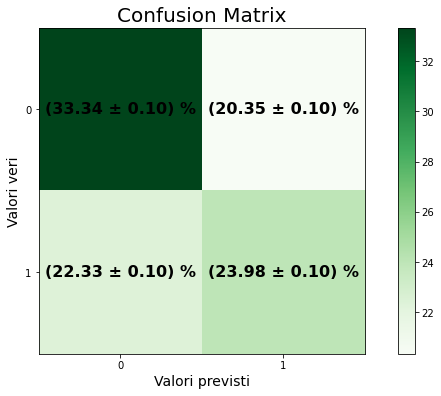

In [23]:
# Calcolo la Matrice di confusione e il suo relativo errore per il plot
ConfusionMat = risultati['globConfusionMatrix'][:,:,miglior_caso]
ConfusionMat_err = risultati['globConfusionMatrixErr'][:,:,miglior_caso]
ConfusionMat_tot = np.sum(ConfusionMat)
ConfusionMat_plot = ConfusionMat / ConfusionMat_tot * 100
ConfusionMat_plot_err = ConfusionMat_err / ConfusionMat_tot * 100


# Plotto la matrice
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Confusion Matrix", fontsize = 20)

im = ax.imshow(ConfusionMat_plot, cmap = "Greens", origin = "upper")
# Disegno la colorbar
fig.colorbar(im)

# Stampo i valori con gli errori
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, f"({ConfusionMat_plot[i, j]:.2f} ± {ConfusionMat_plot_err[i, j]:.2f}) %",
                       ha = "center", va = "center", color = "k", fontsize = 16, weight = "semibold")

# Setto gli assi tra 0 e 1
ax.set_xticks((0,1))
ax.set_yticks((0,1))
ax.set_xlabel("Valori previsti", fontsize = 14)
ax.set_ylabel("Valori veri", fontsize = 14)
plt.show()

---

### Valuto la dipendenza di un parametro rispetto agli scoring ottenuti

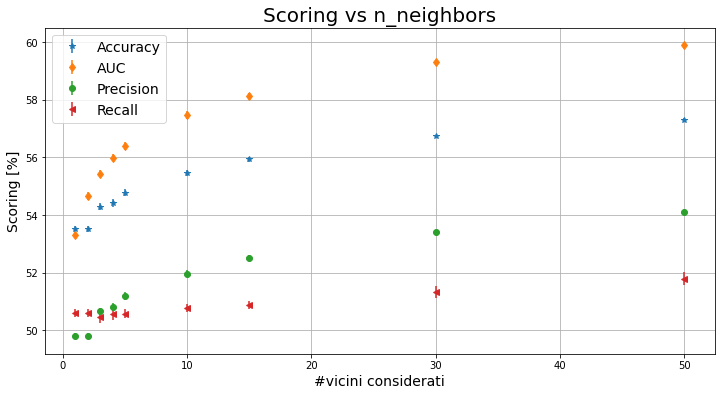

In [53]:
# Creo la condizione per trovare solamente il parametro iperParam_n_neighbors
cond = ( (risultati["iperParam_weights"] == risultati["iperParam_weights"][miglior_caso]) &
         (risultati["iperParam_algorithm"] == risultati["iperParam_algorithm"][miglior_caso]) &
          (risultati["iperParam_p"] == risultati["iperParam_p"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs n_neighbors", fontsize = 20)

ax.errorbar(risultati["iperParam_n_neighbors"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_n_neighbors"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_n_neighbors"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_n_neighbors"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("#vicini considerati", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

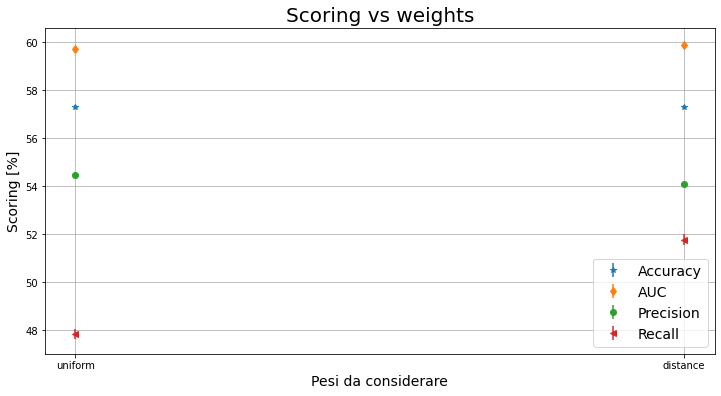

In [54]:
# Creo la condizione per trovare solamente il parametro iperParam_weights
cond = ( (risultati["iperParam_n_neighbors"] == risultati["iperParam_n_neighbors"][miglior_caso]) &
         (risultati["iperParam_algorithm"] == risultati["iperParam_algorithm"][miglior_caso]) &
          (risultati["iperParam_p"] == risultati["iperParam_p"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs weights", fontsize = 20)

ax.errorbar(risultati["iperParam_weights"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_weights"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_weights"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_weights"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Pesi da considerare", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

Visto che sono solo due casi faccio una tabella con i valori e non esporto la figura

In [55]:
# Creo la condizione per trovare solamente il parametro iperParam_algorithm
cond = ( (risultati["iperParam_n_neighbors"] == risultati["iperParam_n_neighbors"][miglior_caso]) &
         (risultati["iperParam_weights"] == risultati["iperParam_weights"][miglior_caso]) &
          (risultati["iperParam_p"] == risultati["iperParam_p"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs algorithm", fontsize = 20)

ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Algoritmo utilizzato", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

Anche in questo caso, visto che sono solo tre casi faccio una tabella con i valori e non esporto la figura

In [56]:
# Creo la condizione per trovare solamente il parametro iperParam_p
cond = ( (risultati["iperParam_n_neighbors"] == risultati["iperParam_n_neighbors"][miglior_caso]) &
         (risultati["iperParam_weights"] == risultati["iperParam_weights"][miglior_caso]) &
          (risultati["iperParam_algorithm"] == risultati["iperParam_algorithm"][miglior_caso]) )


# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs p", fontsize = 20)

ax.errorbar(risultati["iperParam_p"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_p"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_p"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_p"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Come calcolo la distanza", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

Visto che sono solo due casi faccio una tabella con i valori e non esporto la figura